- визуализировать распределения на train/test
- координаты

In [1]:
# !pip install pandas-bokeh

In [1]:
import numpy as np

In [2]:
import pandas as pd
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [3]:
import pandas as pd
import cufflinks as cf
from IPython.display import display,HTML
#making all charts public and setting a global theme
cf.set_config_file(sharing='public',theme='white',offline=True)

# iplot

In [4]:
import plotly.express as px

In [5]:
from plotly.figure_factory import create_distplot

In [6]:
pd.options.plotting.backend = "plotly"

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [9]:
nifty_data = pd.read_csv('data/NIFTY_data_2020.csv',parse_dates=["Date"],index_col='Date')
nifty_data.head()

,NIFTY Bank index,NIFTY FMCG index,NIFTY IT index,NIFTY Pharma index
Date,,,,
2020-01-01,32102.90,30234.25,15722.15,8047.10
2020-01-02,32443.85,30266.20,15709.65,8053.95
2020-01-03,32069.25,30109.25,15936.60,8111.95
2020-01-06,31237.15,29799.30,15879.80,7987.35
2020-01-07,31399.40,29861.80,15895.20,8036.50


In [10]:
nifty_data.columns = ['aa', 'bb', 'cc', 'dd']

In [11]:
nifty_data['random_cat'] = np.random.choice([1,2,3],len(nifty_data))
nifty_data['random_cat2'] = np.random.choice([1,2,3],len(nifty_data))
nifty_data['bin_cat'] = np.random.choice([0,1],len(nifty_data))

In [12]:
nifty_data_resample = nifty_data.resample(rule = 'M').mean()
nifty_data_resample.index=['Jan','Feb','March','Apr','May','June','July']
nifty_data_resample.head()

,aa,bb,cc,dd,random_cat,random_cat2,bin_cat
Jan,31446.391304,30791.567391,16177.997826,8184.965217,2.217391,2.217391,0.478261
Feb,30675.427500,30468.122500,16411.647500,8140.932500,1.800000,2.000000,0.550000
March,22936.040476,26407.204762,13356.300000,7187.983333,1.809524,1.952381,0.380952
Apr,19715.116667,28622.122222,12750.766667,8926.777778,2.000000,1.888889,0.333333
May,18707.215789,27325.952632,13569.336842,9324.586842,2.105263,1.789474,0.315789


In [13]:
target_var = 'aa'

# line

In [25]:
# nifty_data.plot_bokeh(kind='line') #equivalent to nifty_data.plot_bokeh.line()

In [26]:
# nifty_data.iplot(kind='line')

In [27]:
# px.line(nifty_data)

In [187]:
# fig = nifty_data.plot.line(color_discrete_sequence=px.colors.qualitative.G10)
# fig.update_traces(mode="markers+lines", hovertemplate=None)
# fig.update_layout(hovermode="x unified")
# fig.update_layout(title='Title')
# fig.show()

In [29]:
# nifty_data.groupby(
#     "Date"
# ).sum().plot.line(color_discrete_sequence=px.colors.qualitative.G10)

In [14]:
fig = nifty_data.plot.line(color_discrete_sequence=px.colors.qualitative.G10, x='aa', y='bb')
fig.update_traces(mode="markers+lines", hovertemplate=None) 
fig.update_layout(hovermode="x unified")
# fig.update_layout(title='Title')
fig.show()

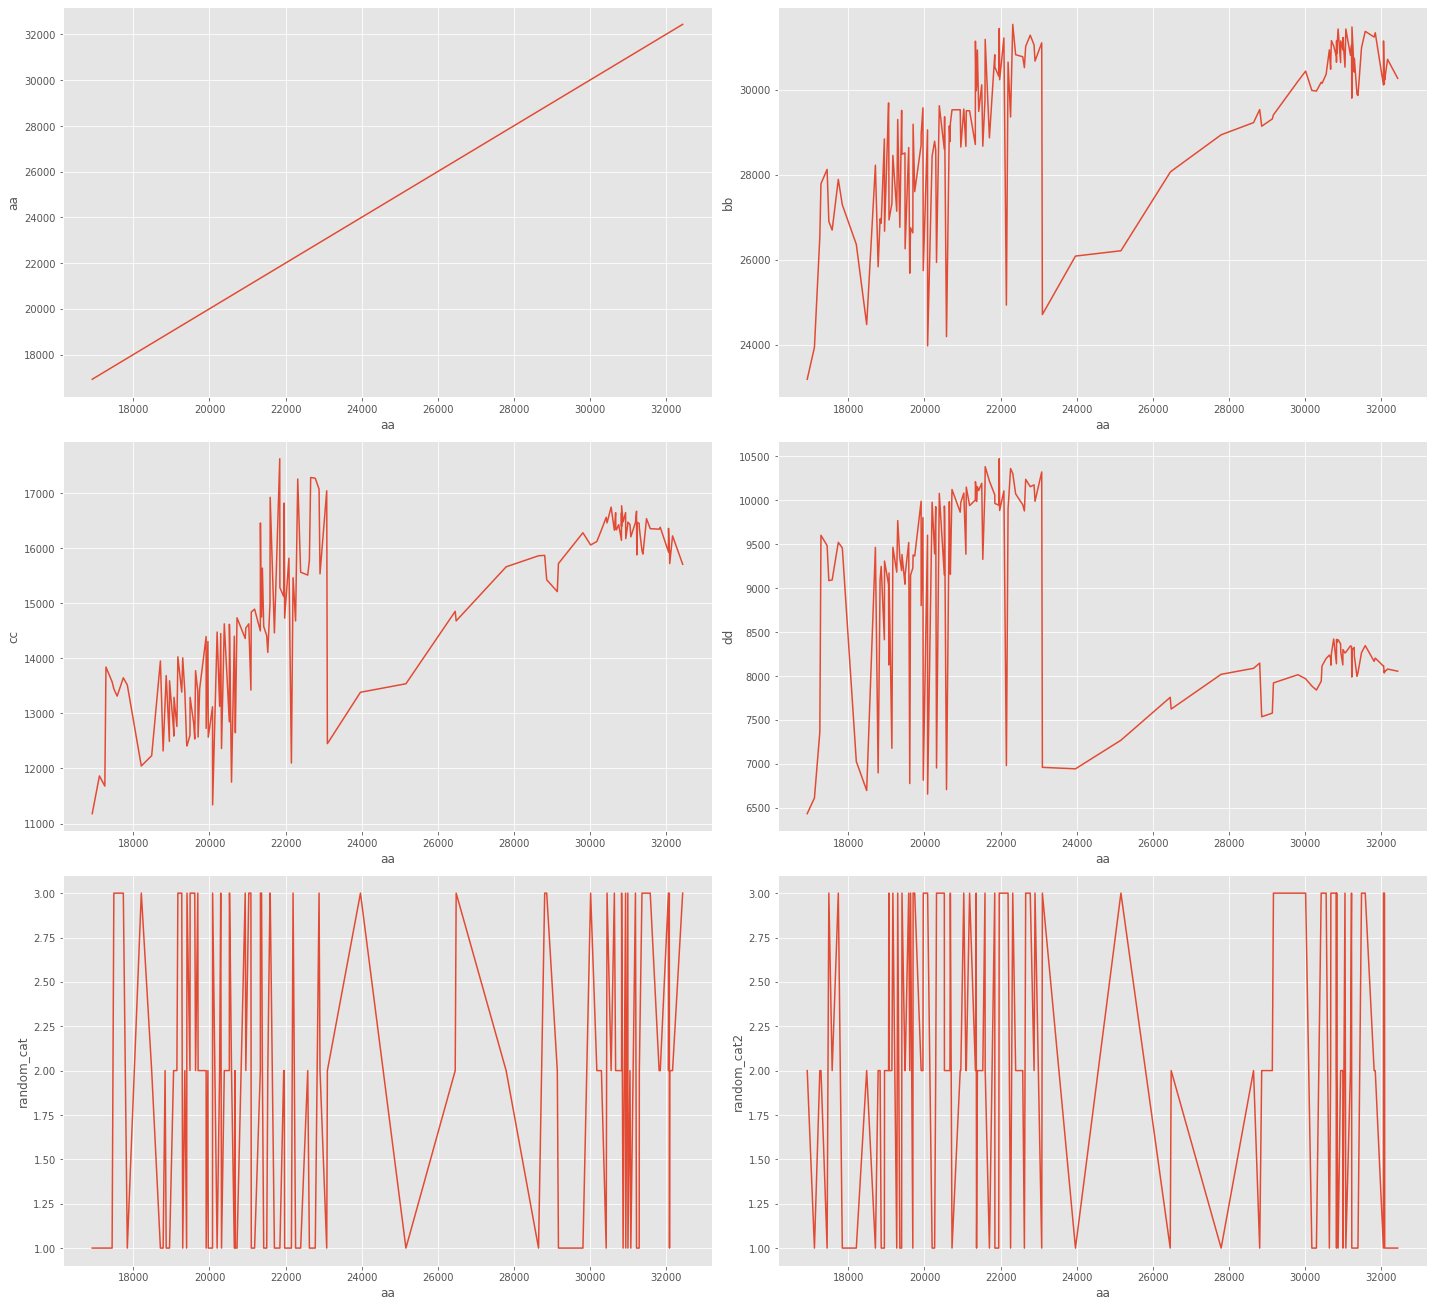

In [82]:
fig = plt.figure(figsize=(20,60))
for index in range(len(nifty_data.columns)):
    plt.subplot(10,2,index+1)
    sns.lineplot(x=target_var, y=nifty_data.iloc[:,index], data=nifty_data) # size
fig.tight_layout(pad=1.0)

# scatter

In [33]:
# nifty_data.plot_bokeh.scatter(x='NIFTY FMCG index', y='NIFTY Bank index');

In [34]:
# nifty_data.iplot(kind='scatter',x='NIFTY FMCG index', y='NIFTY Bank index' ,mode='markers');

In [35]:
color_continuous_scale=px.colors.qualitative.G10

In [37]:
fig = px.scatter(nifty_data, x='aa', y='bb', 
                 color='random_cat', 
#                  size='random_cat',
#                  hover_data=['NIFTY IT index'], # other columns to hover data,
                 color_continuous_scale=px.colors.sequential.YlOrRd # Greens
                )
fig.update_traces(marker_size=10)
fig.show()

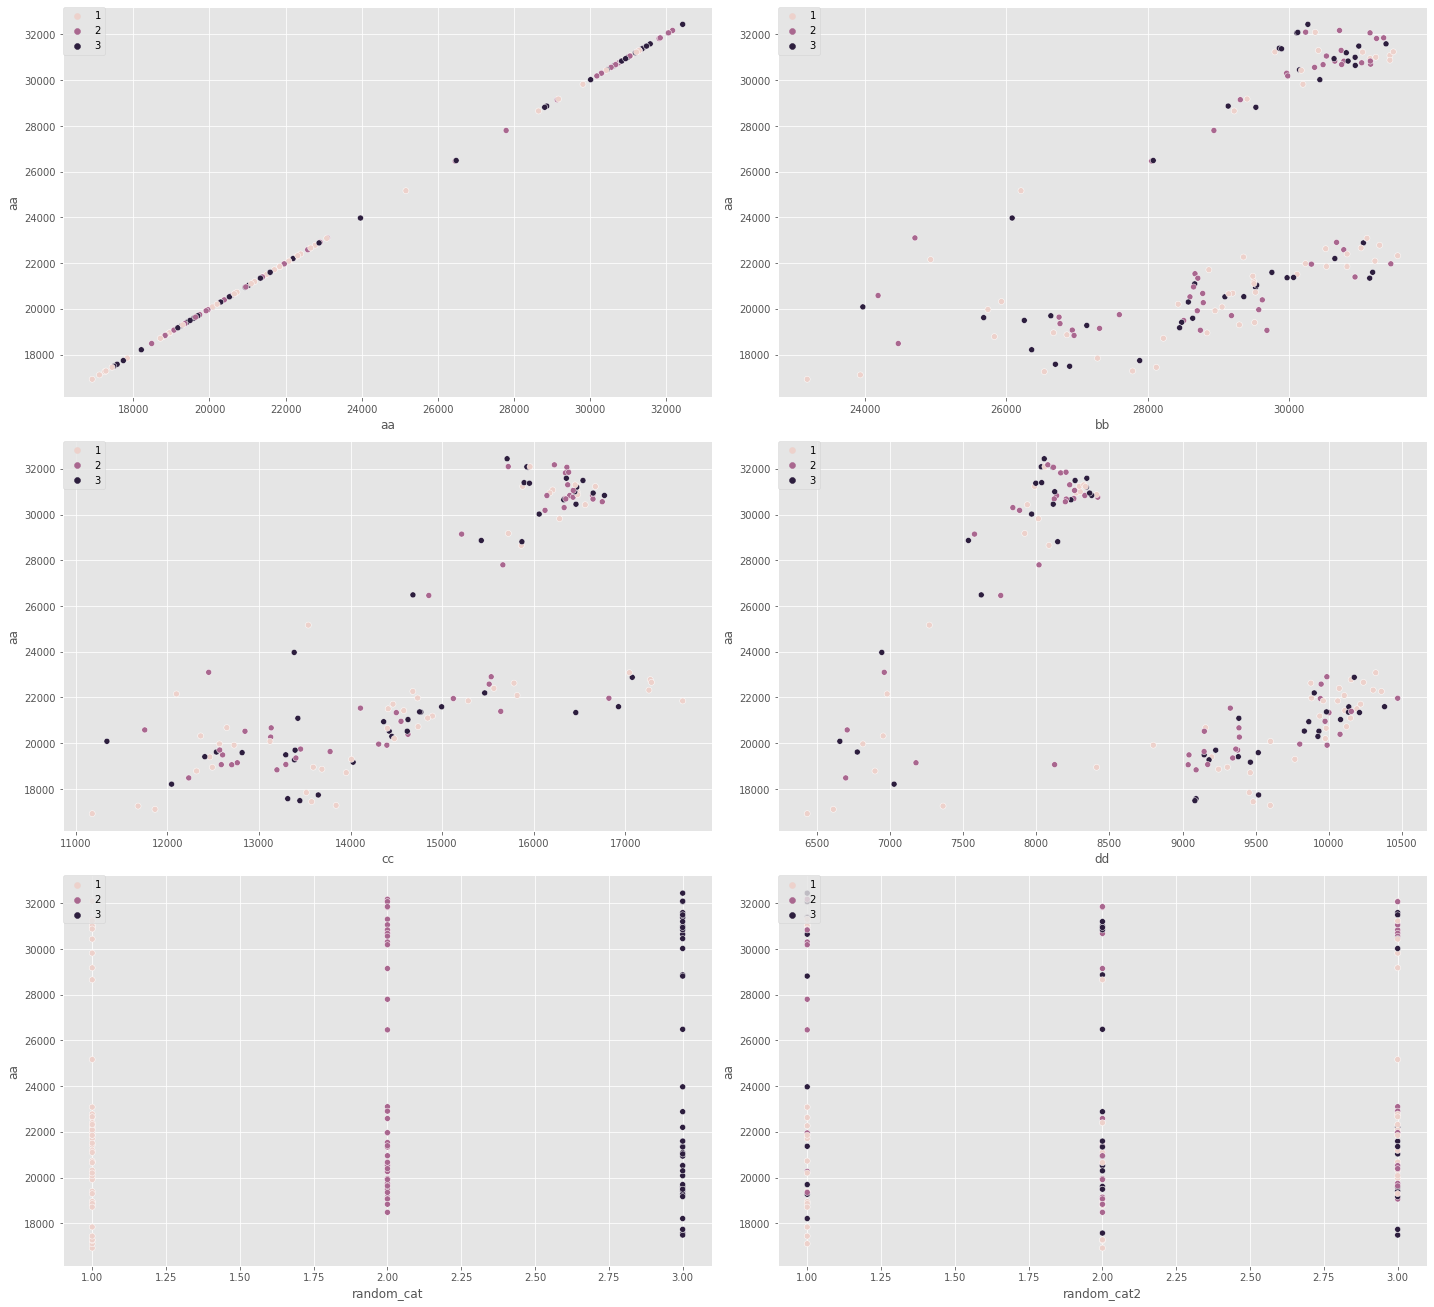

In [73]:
fig = plt.figure(figsize=(20,60))
for index in range(len(nifty_data.columns)):
    plt.subplot(10,2,index+1)
    sns.scatterplot(x=nifty_data.iloc[:,index], y=target_var, data=nifty_data, hue='random_cat') # size
    plt.legend(loc='upper left', borderaxespad=0)
fig.tight_layout(pad=1.0)

In [231]:
nifty_data.iloc[:,2:].mean().sort_values().plot(kind='scatter') # выявление кластеров

# histogram

In [92]:
# nifty_data[['NIFTY FMCG index','NIFTY Bank index']].plot_bokeh(kind='hist', bins=30);

In [104]:
# nifty_data[['NIFTY FMCG index','NIFTY Bank index']].iplot(kind='hist', bins=30);

## one

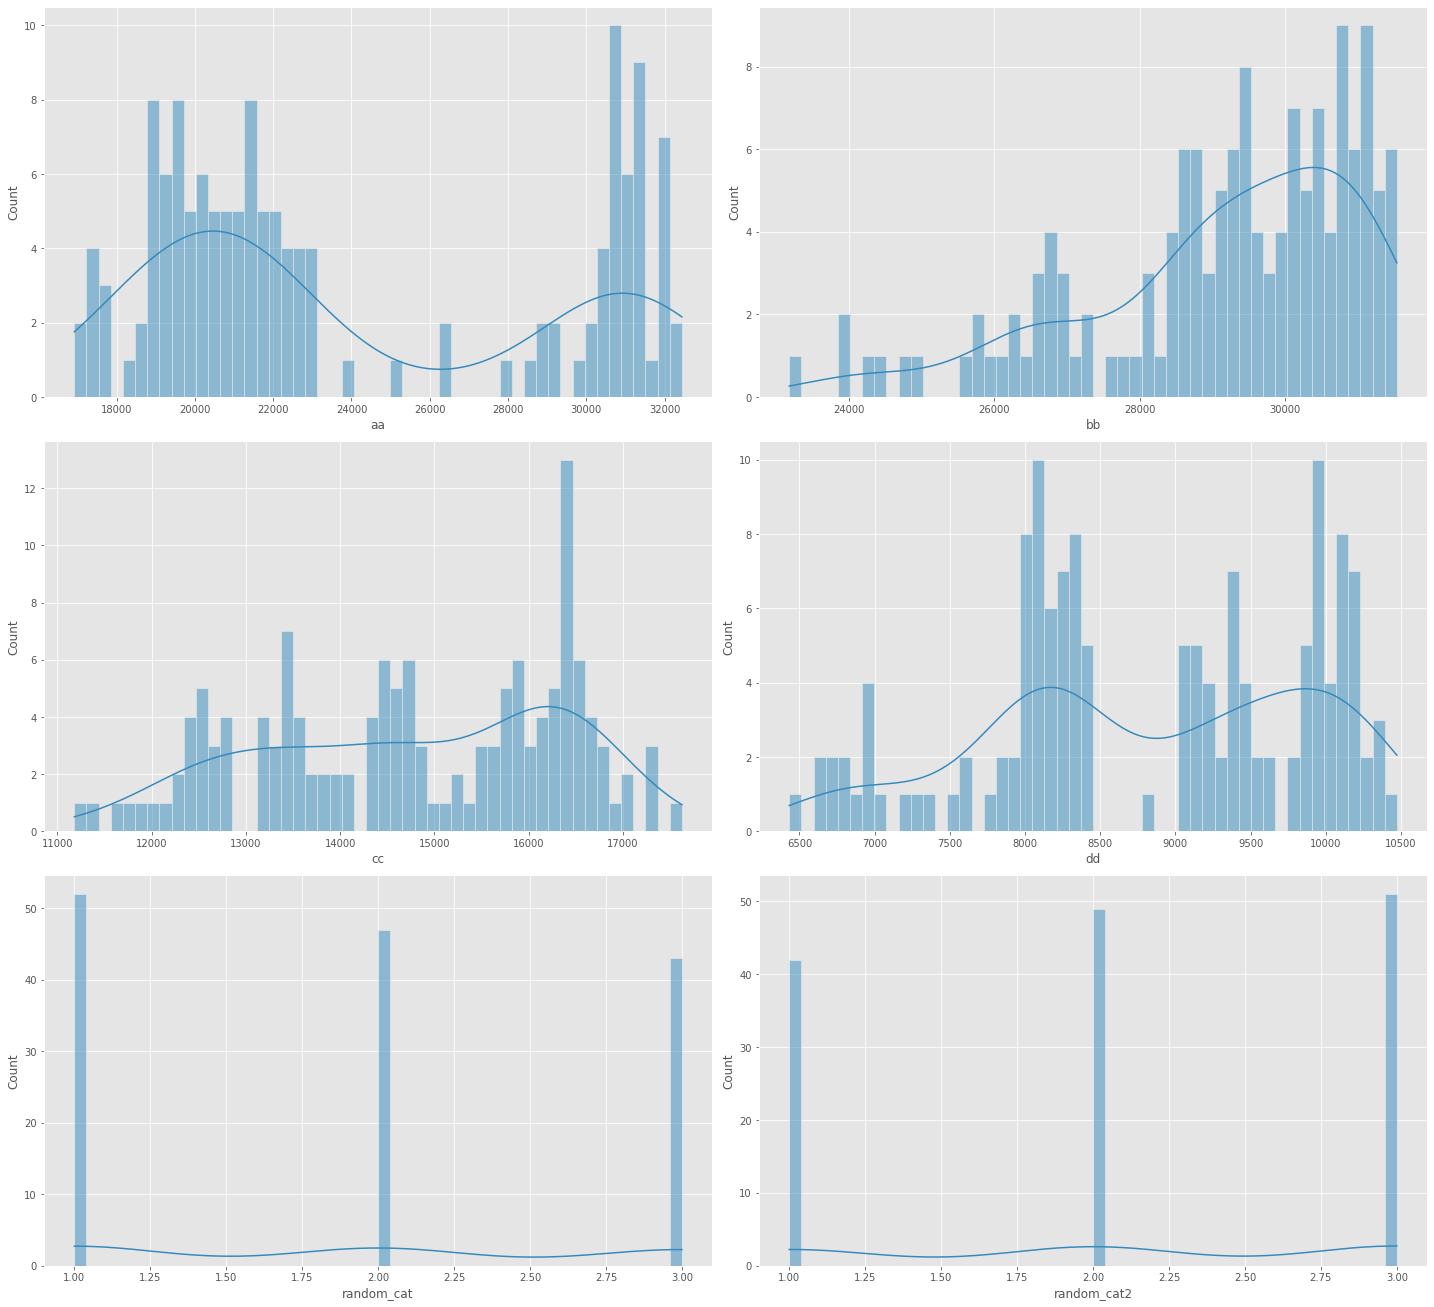

In [119]:
fig = plt.figure(figsize=(20,60))
for index in range(len(nifty_data.columns)):
    plt.subplot(10,2,index+1)
    sns.histplot(x=nifty_data.iloc[:,index], data=nifty_data, kde=True, bins=50)
fig.tight_layout(pad=1.0)

## distribution

In [129]:
# hisogram for numeric features, colored by class of target variable
def num_feat_hist(df, target, num_feat, bins=50):
    import matplotlib.gridspec as gridspec
    plt.figure(figsize=(12, len(num_feat)*5))
    gs = gridspec.GridSpec(len(num_feat),1)
    for i, col in enumerate(df[num_feat]):
        ax = plt.subplot(gs[i])
        
#         for cat_val in df[target].unique():
#             sns.distplot(df[col][df[target]==cat_val], bins=bins)
    
        sns.distplot(df[col], bins=bins)
         
        ax.set_xlabel("")
        ax.set_title("histogram of feature: " + str(col))
#         ax.legend(labels=df[target].unique())
    plt.show()

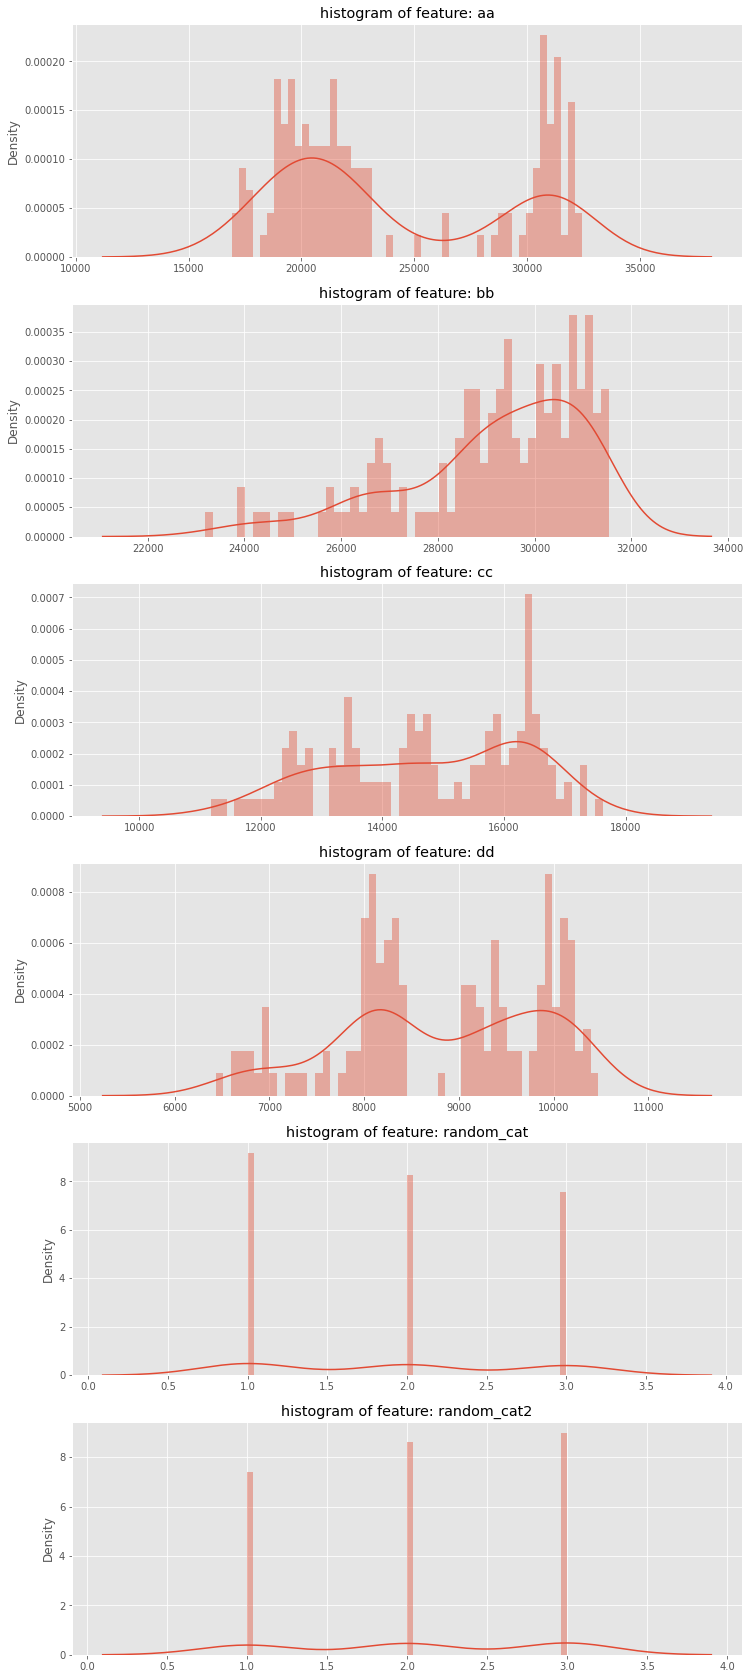

In [130]:
num_feat_hist(nifty_data, 'random_cat', nifty_data.columns)

In [ ]:
# create_distplot([nifty_data[c] for c in nifty_data.columns], nifty_data.columns, 
#                 bin_size=500, show_hist=True, show_curve=True)

## together with target

In [115]:
nifty_data[[target_var, 'bb']].plot.hist(barmode="overlay", 
                                                  marginal="rug", 
                                                  nbins=50)

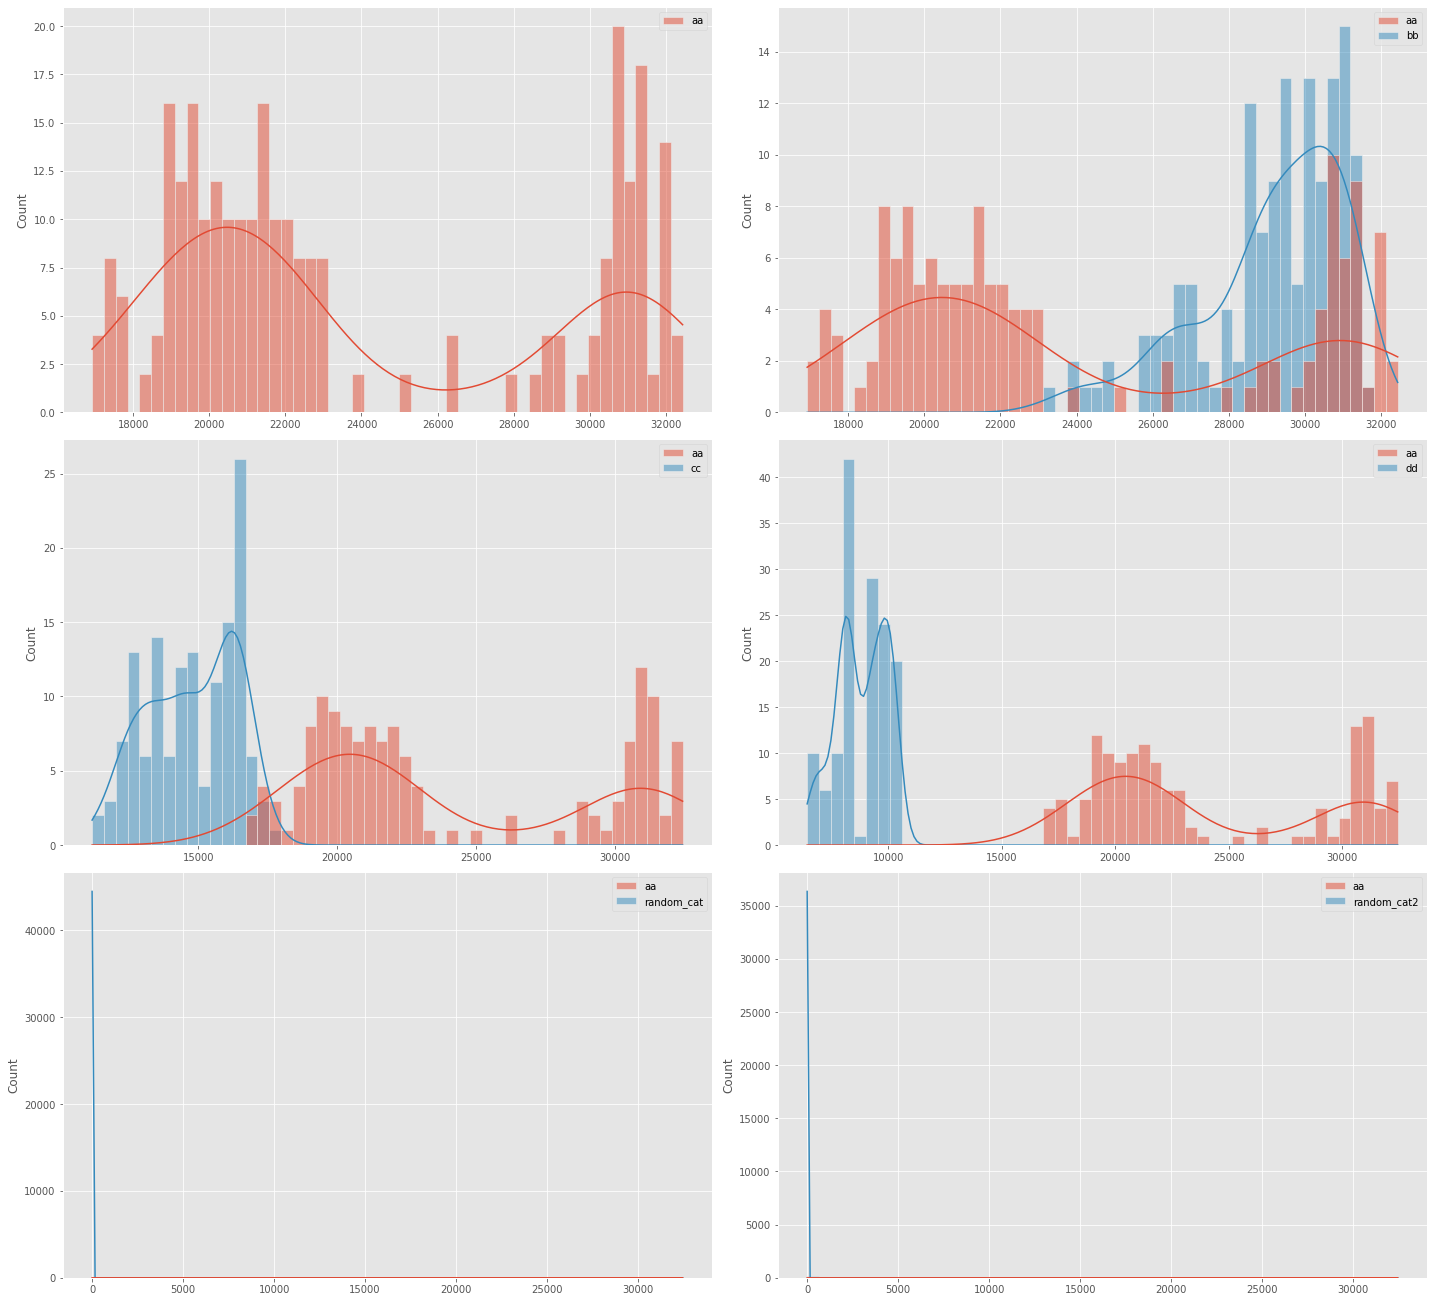

In [117]:
fig = plt.figure(figsize=(20,60))
for index in range(len(nifty_data.columns)):
    plt.subplot(10,2,index+1)
    sns.histplot(data=nifty_data[[target_var, nifty_data.columns[index]]], kde=True, bins=50) # size
fig.tight_layout(pad=1.0)

## dist by cat

In [109]:
px.histogram(nifty_data, x=target_var, color='random_cat', 
             marginal="rug", # or violin, box
             nbins=50, opacity=0.5, barmode="overlay")

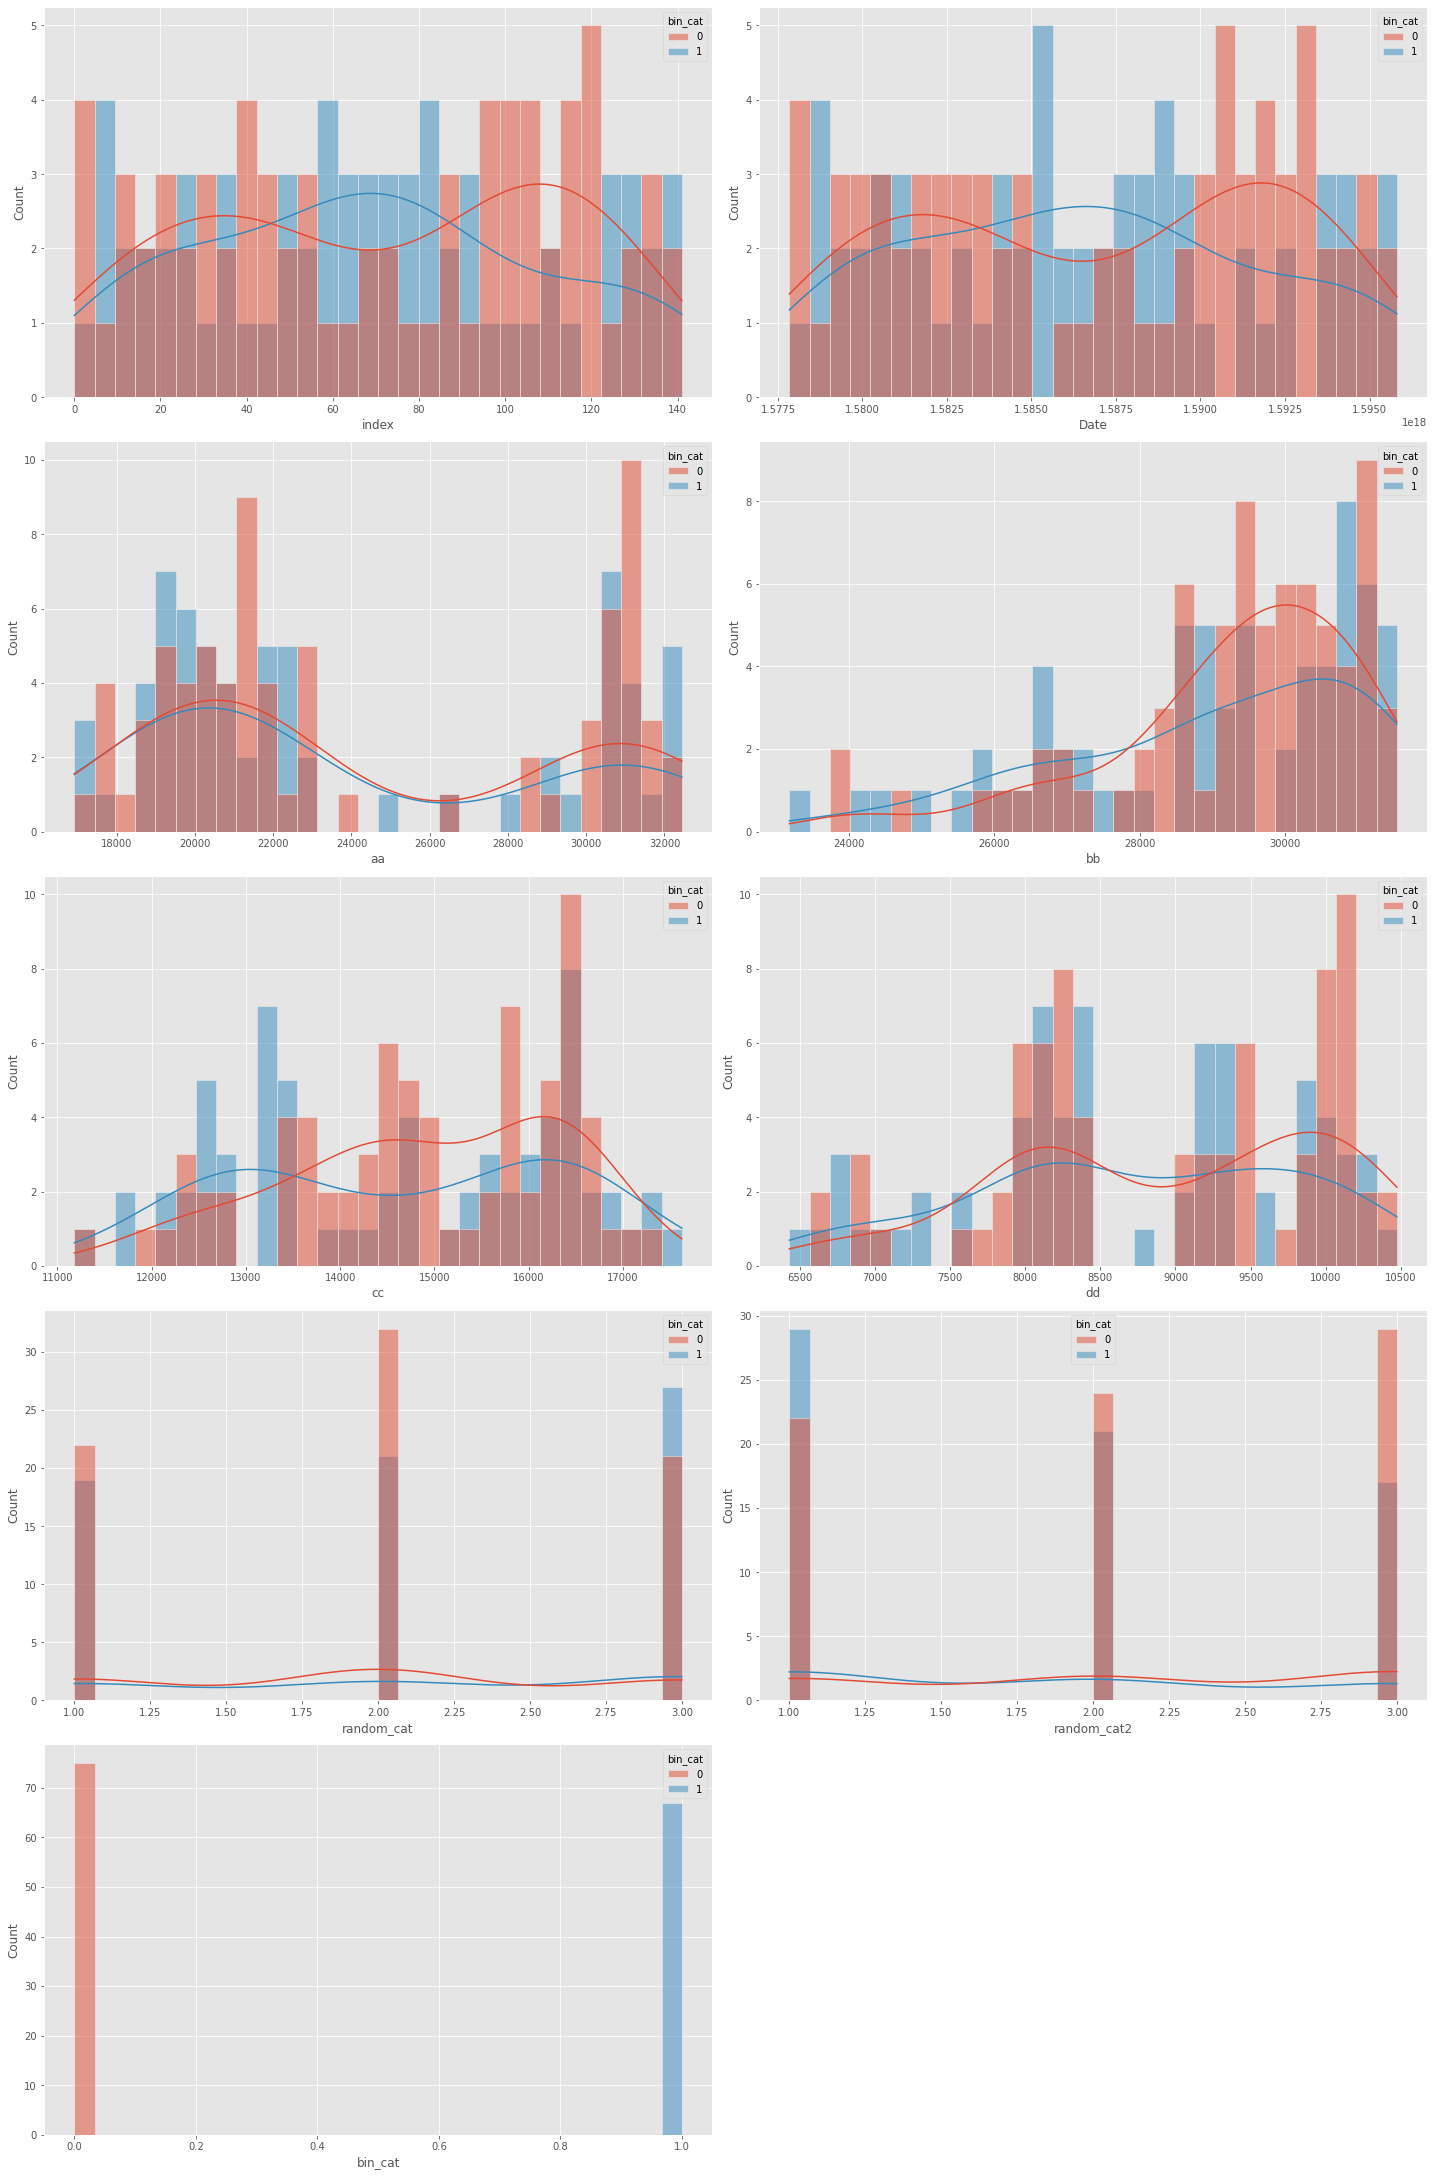

In [234]:
fig = plt.figure(figsize=(20,60))
for index in range(len(nifty_data.columns)):
    plt.subplot(10,2,index+1)
    sns.histplot(x=nifty_data.iloc[:,index], data=nifty_data, kde=True, hue='bin_cat', bins=30)
fig.tight_layout(pad=1.0)

# barplot

In [82]:
# nifty_data_resample.plot_bokeh(kind='bar');

In [253]:
# nifty_data_resample.iplot(kind='bar');

In [154]:
# nifty_data_resample.plot.bar()
nifty_data_resample['aa'].plot.bar(barmode='group')

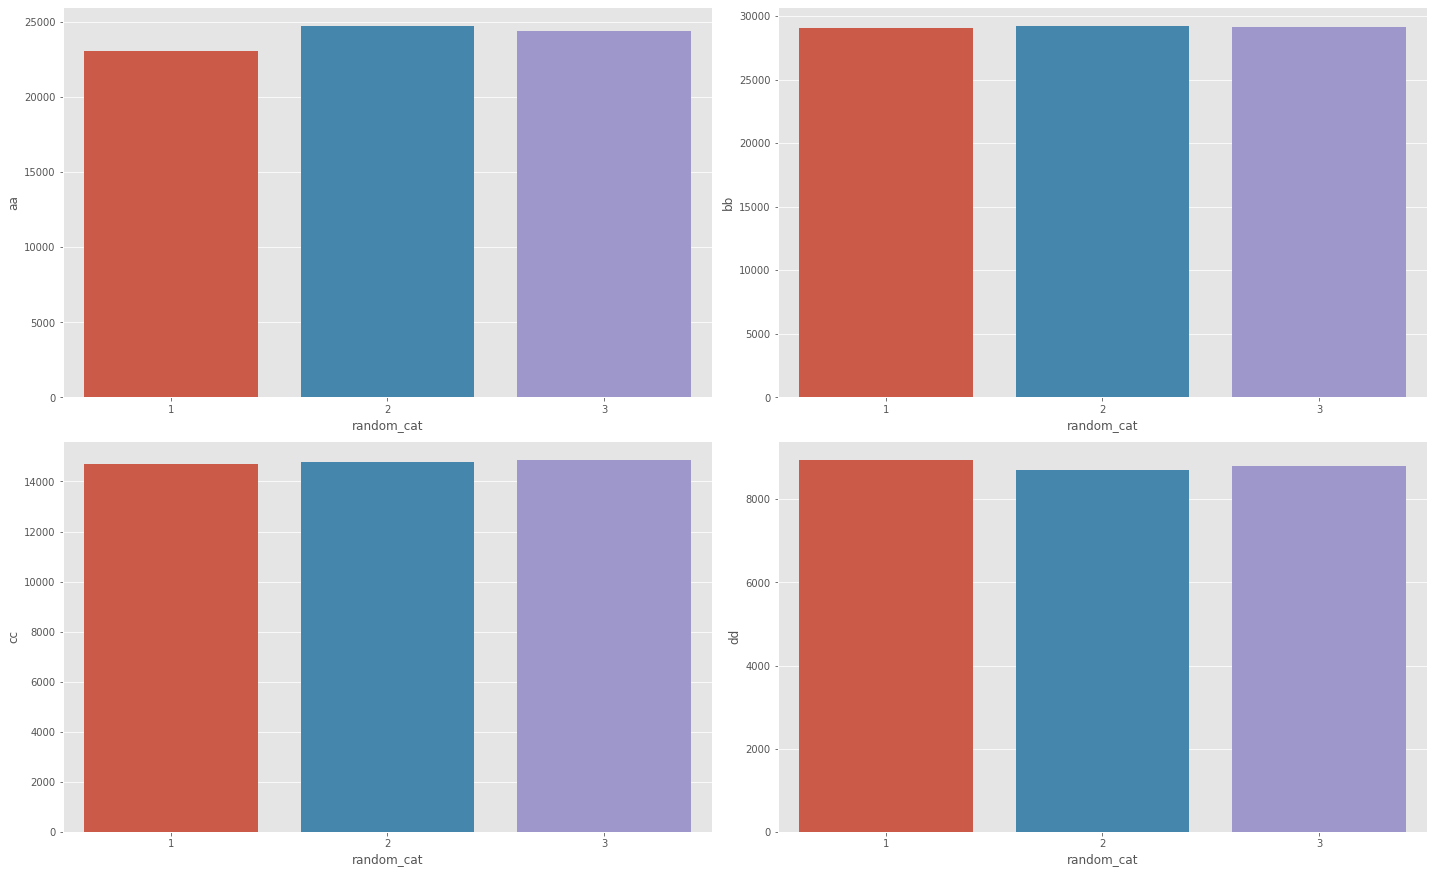

In [153]:
cat = 'random_cat'

fig = plt.figure(figsize=(20,60))
for index in range(len(nifty_data.columns[:4])):
    
    var = nifty_data.columns[index]
    
    d = nifty_data.groupby(cat)[var].mean()
    
    plt.subplot(10,2,index+1)
    
    sns.barplot(x=cat, y=var, data=d.reset_index())

fig.tight_layout(pad=1.0)

# stacked barplot

In [83]:
# nifty_data_resample.plot_bokeh(kind='barh',stacked=True);

In [155]:
# nifty_data_resample.iplot(kind='barh',barmode = 'stack');

In [156]:
# nifty_data_resample.plot.barh()

# pie chart

In [86]:
# nifty_data_resample.plot_bokeh.pie(y ='NIFTY Bank index')

In [87]:
# nifty_data_resample.plot_bokeh.pie()

In [157]:
# nifty_data_resample.reset_index().iplot(kind='pie',labels='index',values='NIFTY Bank index')

# pairplot

In [158]:
nifty_data.head()

,aa,bb,cc,dd,random_cat,random_cat2
Date,,,,,,
2020-01-01,32102.90,30234.25,15722.15,8047.10,2,1
2020-01-02,32443.85,30266.20,15709.65,8053.95,3,1
2020-01-03,32069.25,30109.25,15936.60,8111.95,3,1
2020-01-06,31237.15,29799.30,15879.80,7987.35,1,1
2020-01-07,31399.40,29861.80,15895.20,8036.50,3,1


In [192]:
pd.scat(nifty_data);

AttributeError: module 'pandas' has no attribute 'scatter_matrix'

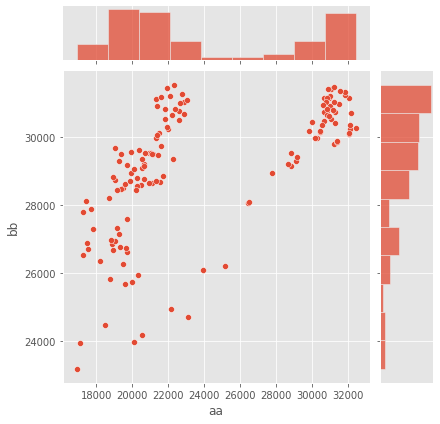

In [161]:
sns.jointplot(x='aa', y='bb', data=nifty_data, kind="scatter");

In [162]:
# fig = px.density_heatmap(nifty_data, x='NIFTY FMCG index', y='NIFTY Bank index', marginal_x="box", marginal_y="violin",
#                         color_continuous_scale=px.colors.sequential.Greens)
# fig.show()

# boxplot

In [164]:
fig = px.box(nifty_data, x="random_cat", y="aa", points="all")
fig.show()

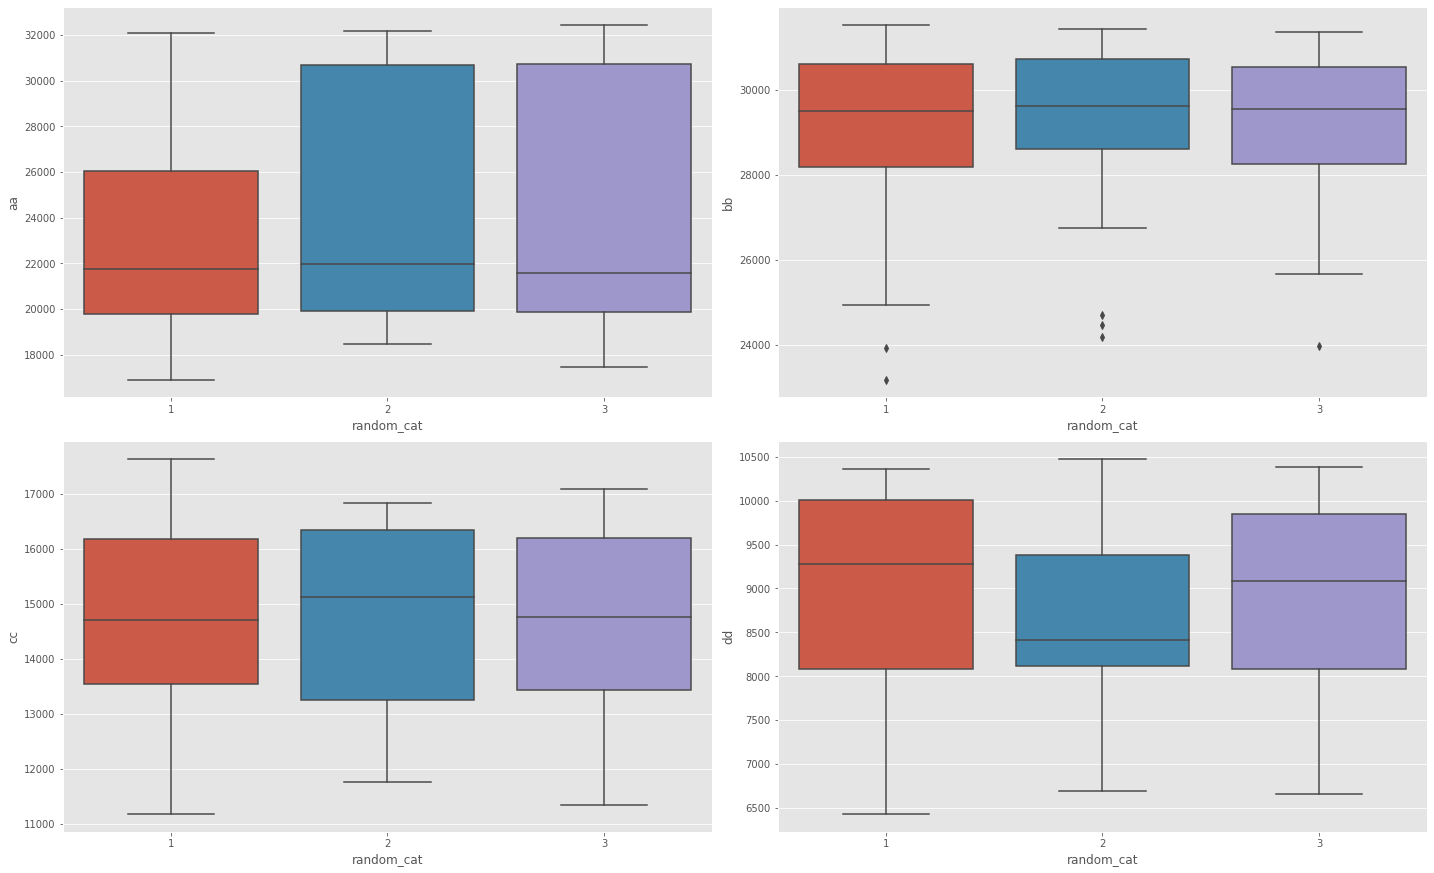

In [177]:
cat = 'random_cat'

fig = plt.figure(figsize=(20,60))
for index in range(len(nifty_data.columns[:4])):
    
    var = nifty_data.columns[index]
    
    plt.subplot(10,2,index+1)
    
    sns.boxplot(x="random_cat", y=var, data=nifty_data)

fig.tight_layout(pad=1.0)

# heatmap

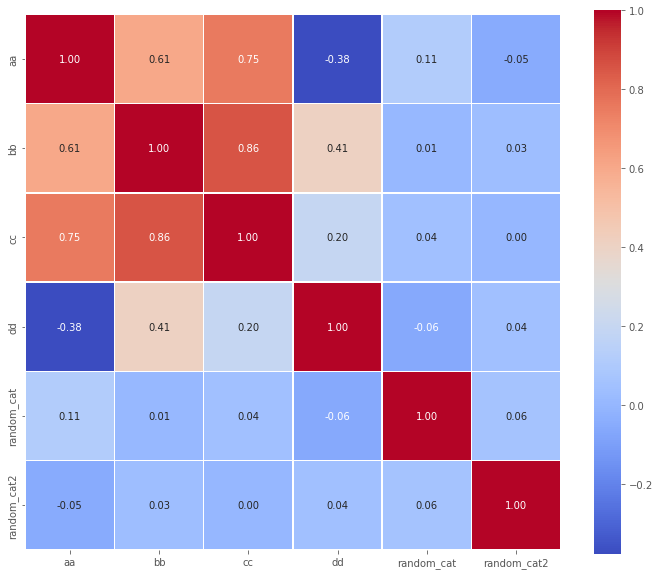

In [170]:
corr_df = nifty_data.corr(method='pearson')
plt.figure(figsize=(12,10))
sns.heatmap(corr_df, annot=True, fmt=".2f", linewidths=0.5, cmap="coolwarm", square=True); # bwr, YlGnBu

# gt_matrix

In [248]:
def autolabel(arrayA):
    arrayA = np.array(arrayA)
    for i in range(arrayA.shape[0]):
        for j in range(arrayA.shape[1]):
            plt.text(j, i, "%.2f"%arrayA[i,j], ha="center", va="bottom", color="w", size=20)
    

def gt_matrix(df, sz=16):
    a = []
    feats = df.columns
    for i,c1 in enumerate(feats):
        b = []
        for j,c2 in enumerate(feats):
            mask = (-df[c1].isnull()) & (-df[c2].isnull())
            if i>=j:
                b.append((df.loc[mask,c1].values>=df.loc[mask,c2].values).mean())
            else:
                b.append((df.loc[mask,c1].values>df.loc[mask,c2].values).mean())
        a.append(b)
    plt.figure(figsize= (sz,sz))
    plt.imshow(a, interpolation="None", cmap="coolwarm")
    _ = plt.xticks(range(len(feats)), feats, rotation = 90, size=15)
    _ = plt.yticks(range(len(feats)), feats, rotation = 0, size=15)
    autolabel(a)
    
def sorted_nicely(l):
    convert = lambda text: int(text) if text.isdigit() else text
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)]
    return sorted(l, key = alphanum_key)

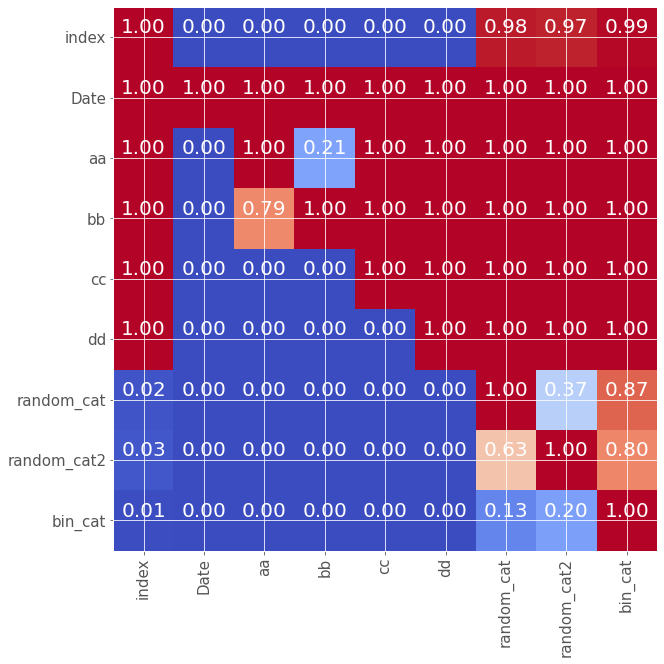

In [251]:
# x в n% случаев больше y
gt_matrix(nifty_data, sz=10)

# star

In [ ]:
# !pip install matplotlib==3.2.0

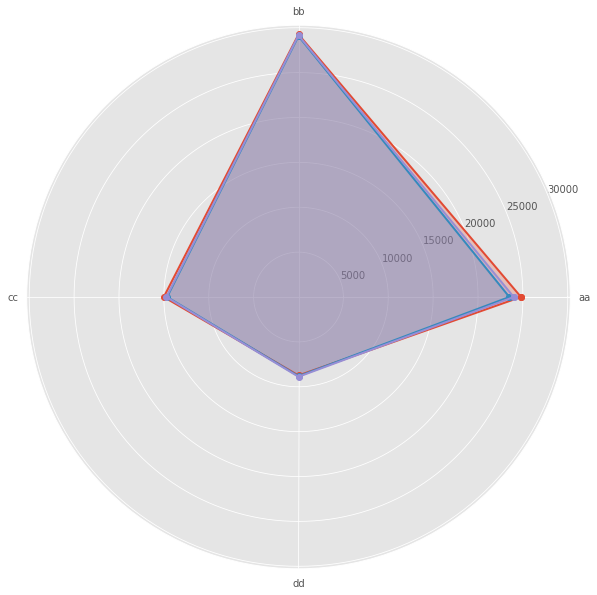

In [15]:
fig = plt.figure(figsize=(10,10))
for cat_val in nifty_data['random_cat'].unique():
    
    labels = nifty_data[nifty_data['random_cat']==cat_val].loc[:,'aa':'dd'].mean().index
    stats = nifty_data[nifty_data['random_cat']==cat_val].loc[:,'aa':'dd'].mean().values

    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    
#     fig=plt.figure() # !!!
    
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    # ax.set_title([nifty_data.loc[30,"Name"]])
    ax.grid(True)